<a href="https://colab.research.google.com/github/aryangarg11092003-ship-it/Data-Analytics-on-Global-Data-Jobs-Market/blob/main/credit_risk_model_aryangarg_DBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Risk Model

Build By Aryan garg                                                   
Student of Department of Business Economics



              precision    recall  f1-score   support

           0       0.94      1.00      0.97       281
           1       0.00      0.00      0.00        19

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.88      0.94      0.91       300

AUC Score: 0.4300430792283199


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


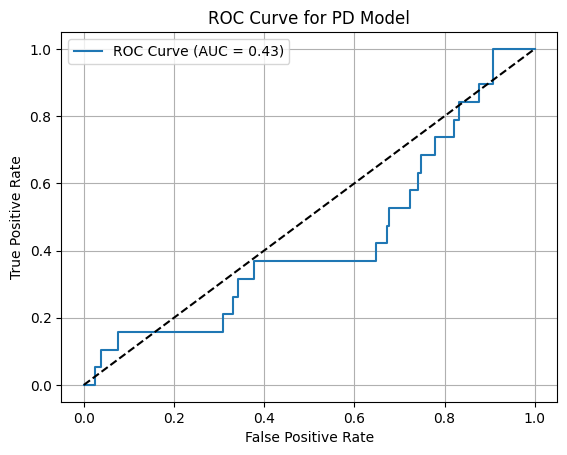

In [ ]:
# Step 0: Install required packages (use this in terminal if not installed)
# pip install pandas numpy scikit-learn matplotlib seaborn

# Step 1: Import libraries
import pandas as pd                    # For data manipulation and DataFrame operations
import numpy as np                     # For numerical operations and generating random data
from sklearn.model_selection import train_test_split   # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression     # Logistic Regression model for classification
from sklearn.metrics import classification_report, roc_auc_score, roc_curve  # For model evaluation
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns                  # For enhanced data visualization (optional in this script)

# Step 2: Generate sample (synthetic) data
np.random.seed(42)                    # Set seed for reproducibility (results remain same on each run)
n = 1000                              # Total number of samples

# Create a DataFrame with fake loan data
df = pd.DataFrame({
    'loan_amount': np.random.normal(50000, 15000, n),      # Normally distributed loan amounts
    'income': np.random.normal(70000, 20000, n),           # Normally distributed income
    'credit_score': np.random.normal(650, 50, n),          # Normally distributed credit scores
    'age': np.random.randint(21, 65, n),                   # Random integer ages between 21 and 65
    'default': np.random.binomial(1, 0.1, n)               # 10% default probability (binary: 0 or 1)
})

# Step 3: Split data into features and target
X = df[['loan_amount', 'income', 'credit_score', 'age']]  # Features used for prediction
y = df['default']                                         # Target variable (default = 1 or 0)

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 4: Train the Logistic Regression model
model = LogisticRegression()         # Create a logistic regression model object
model.fit(X_train, y_train)          # Train the model using training data

# Step 5: Make predictions
y_probs = model.predict_proba(X_test)[:, 1]   # Predict probability of default (class 1)
y_preds = model.predict(X_test)               # Predict binary outcome (0 or 1)

# Step 6: Evaluate model performance
print(classification_report(y_test, y_preds))              # Print precision, recall, f1-score, etc.
print("AUC Score:", roc_auc_score(y_test, y_probs))        # Print Area Under the Curve (AUC) score

# Step 7: Plot ROC Curve (Receiver Operating Characteristic)
fpr, tpr, _ = roc_curve(y_test, y_probs)                  # Get False Positive Rate and True Positive Rate
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_probs))  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')                           # Plot a diagonal reference line
plt.xlabel("False Positive Rate")                         # X-axis label
plt.ylabel("True Positive Rate")                          # Y-axis label
plt.title("ROC Curve for PD Model")                       # Title of the graph
plt.legend()                                              # Show legend
plt.grid(True)                                            # Add gridlines
plt.show()                                                # Display the plot

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 3: Prepare features and target
X = df[['loan_amount', 'income', 'credit_score', 'age']]
y = df['default']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Train with balanced data
model = LogisticRegression()
model.fit(X_train_bal, y_train_bal)

# Evaluate
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_preds = model.predict(X_test_scaled)
print(classification_report(y_test, y_preds))
print("AUC Score:", roc_auc_score(y_test, y_probs))

# Updated prediction function
def predict_default(loan_amount, income, credit_score, age):
    data = pd.DataFrame([[loan_amount, income, credit_score, age]],
                        columns=['loan_amount', 'income', 'credit_score', 'age'])
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)[0]
    probability = model.predict_proba(data_scaled)[0][1]
    if prediction == 1:
        return f"Default (Probability: {probability:.1%})"
    else:
        return f"No Default (Probability: {probability:.1%})"

# Test
print(predict_default(90000, 800000, 120, 30))
print(predict_default(60000, 500000, 180, 45))


              precision    recall  f1-score   support

           0       0.89      0.55      0.68       271
           1       0.08      0.38      0.13        29

    accuracy                           0.53       300
   macro avg       0.49      0.46      0.41       300
weighted avg       0.81      0.53      0.62       300

AUC Score: 0.4589642448148619
No Default (Probability: 0.2%)
No Default (Probability: 2.0%)
